         Company   Product_Type Production_Year  Greenhouse_Gas_Emissions  \
5228      Adidas  Recycled_Poly      2018-01-01                      3273   
4711      Adidas         Cotton      2018-01-01                      4834   
2724  Forever 21     Microfiber      2018-01-01                      4476   
2725      Adidas          Linen      2018-01-01                      5049   
998         Nike         Tencel      2018-01-01                      3994   

      Pollutants_Emitted  Water_Consumption  Energy_Consumption  \
5228                  25               7924                1387   
4711                  11               4076                1404   
2724                  14               4484                 732   
2725                  21               5187                1266   
998                   22               7641                1184   

      Waste_Generation  Sales_Revenue  
5228               290         438933  
4711               322         576852  
2724          

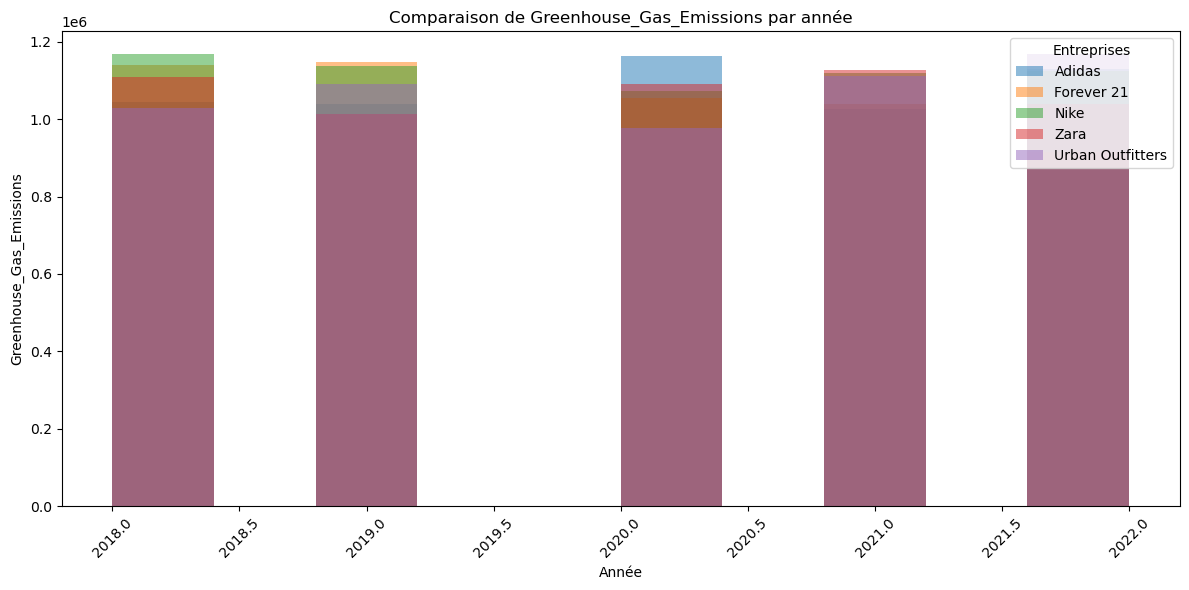

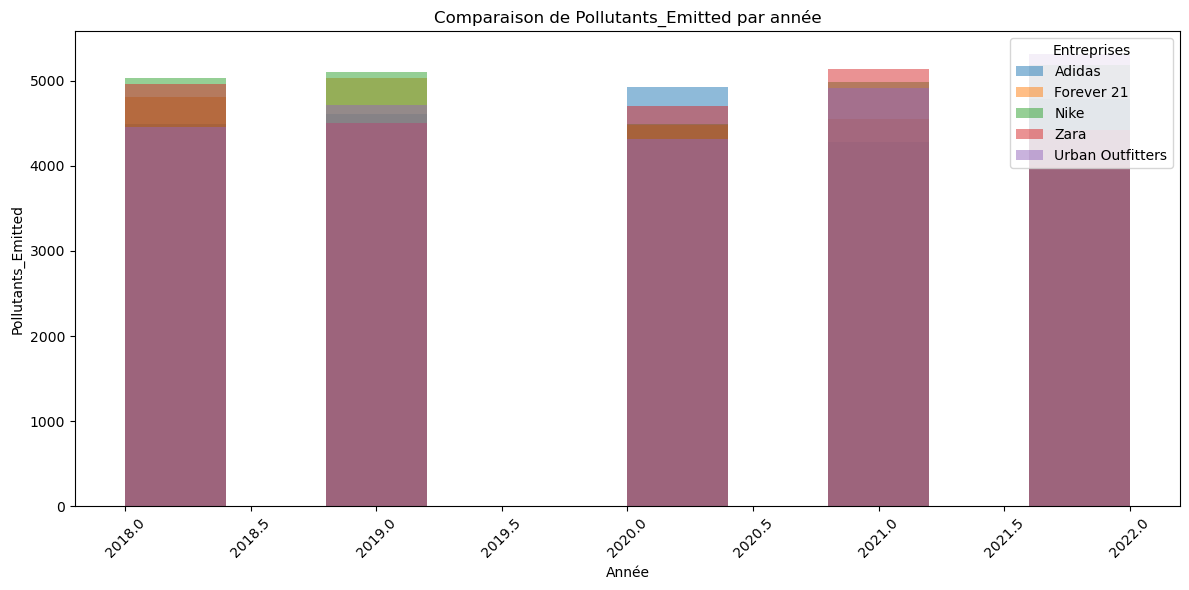

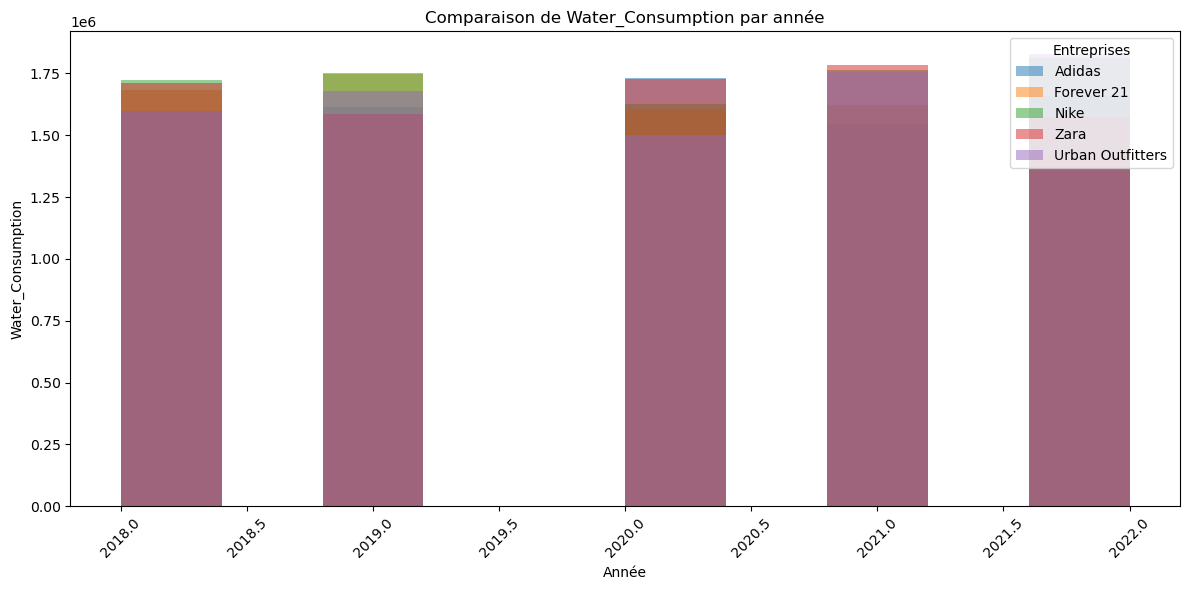

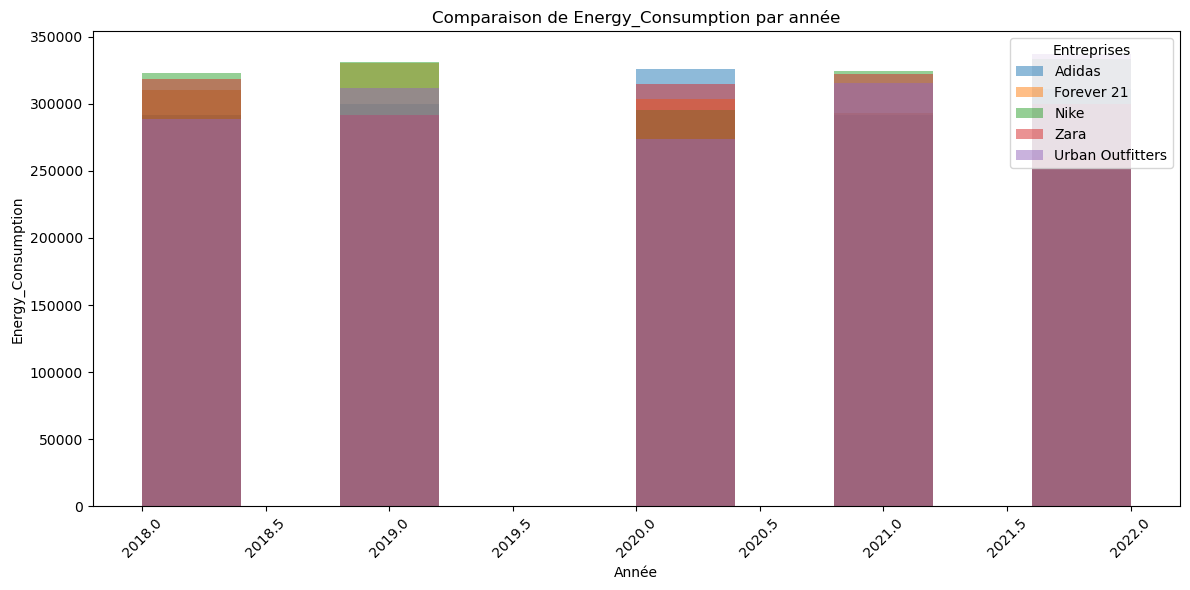

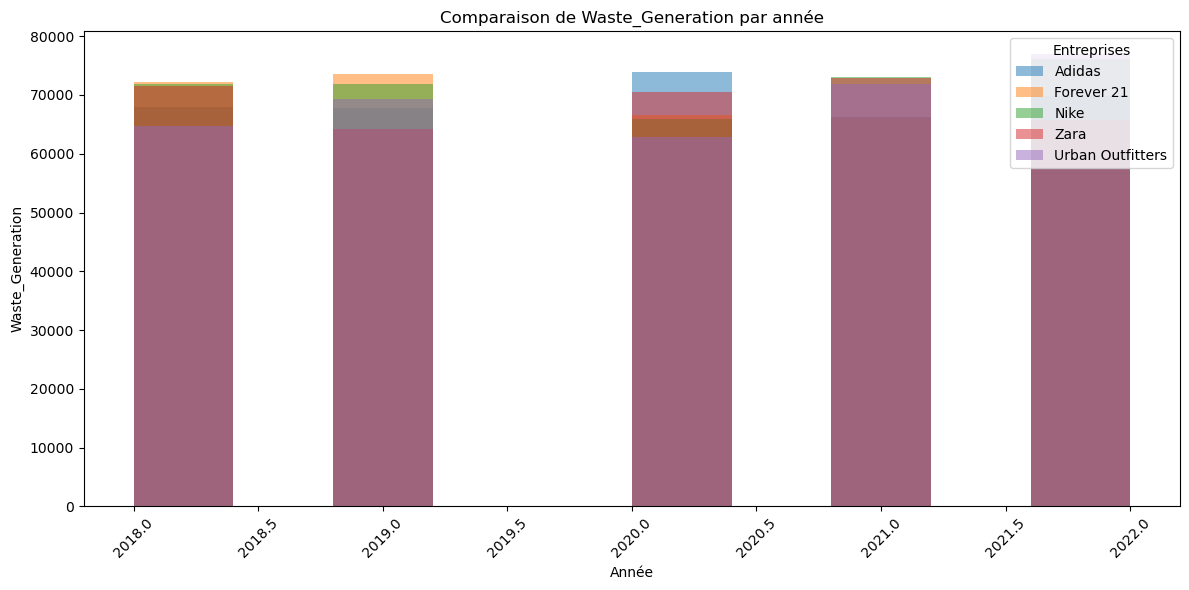

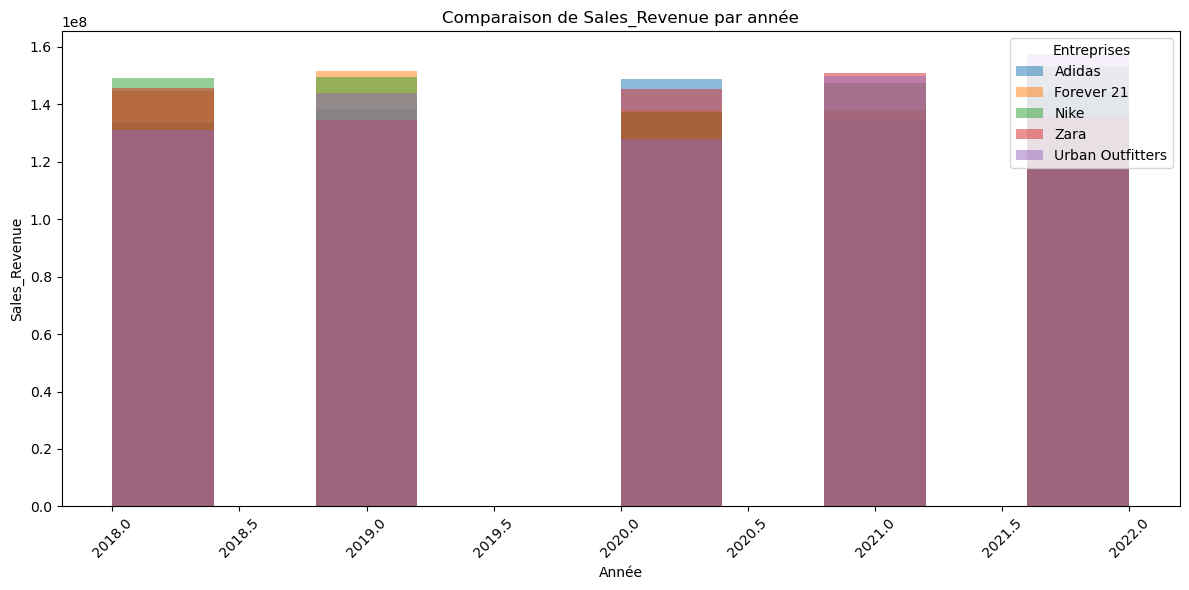

In [6]:
# Importation des bibliothèques dites classiques 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

#Importation des bibliothèques pour de la modélisation 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Prise en main de la base de données et premiers nettoyages 

## Premières esquisses
df = pd.read_csv('data.csv')
df.shape
df.columns
df.head()
df.dropna()
df.reset_index(drop=True, inplace=True)  # Réinitialise l'index à 0
df.index = df.index + 1 
df.head()



# Conversion des années en format "DateTime" + réorganisation du df
df['Production_Year']= pd.to_datetime(df['Production_Year'], format='%Y')
df.head()
df_sorted= df.sort_values(by='Production_Year')
df_sorted.head()

#Obtention des premières statistiques 

stat= df_sorted.describe()
stat #valeurs élementaires 

mediane = df_sorted.select_dtypes(include=['number']).median()
mediane #obtention des médianes des différentes valeurs numériques du df

### Visualisation prmimaire

# Supprimer les lignes contenant 2019.5 dans Production_Year
df_sorted = df_sorted[df_sorted['Production_Year'] != '2019.5']

# Vérification des données après la suppression
print(df_sorted.head())

# Liste des colonnes numériques
numeric_columns = ['Greenhouse_Gas_Emissions', 'Pollutants_Emitted', 'Water_Consumption', 
                   'Energy_Consumption', 'Waste_Generation', 'Sales_Revenue']

# Fonction pour tracer des histogrammes comparant les entreprises
def plot_comparative_histograms(df, time_column, company_column, numeric_columns):
    # Obtenir les entreprises uniques
    companies = df_sorted[company_column].unique()

    # Tracer des histogrammes pour chaque colonne numérique
    for col in numeric_columns:
        plt.figure(figsize=(12, 6))
        
        # Créer un histogramme pour chaque entreprise
        for company in companies:
            # Filtrer les données pour l'entreprise
            company_data = df_sorted[df_sorted[company_column] == company]
            plt.hist(company_data[time_column].dt.year, 
                     weights=company_data[col], 
                     bins=10, 
                     alpha=0.5,  # Translucide pour superposition
                     label=company)

        plt.title(f'Comparaison de {col} par année')
        plt.xlabel('Année')
        plt.ylabel(f'{col}')
        plt.legend(title='Entreprises')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Appel de la fonction pour tracer les histogrammes
graphs= plot_comparative_histograms(df_sorted, time_column='Production_Year', company_column='Company', numeric_columns=numeric_columns)

## les graphes ne s'affichent pas --> voir avec la chargée de TD, tout essayé mais n'apparaît pas dans la console ##


Plus d'analyses statistiques sur la database

## Deuxième approche pour mieux visualiser notre dataset 

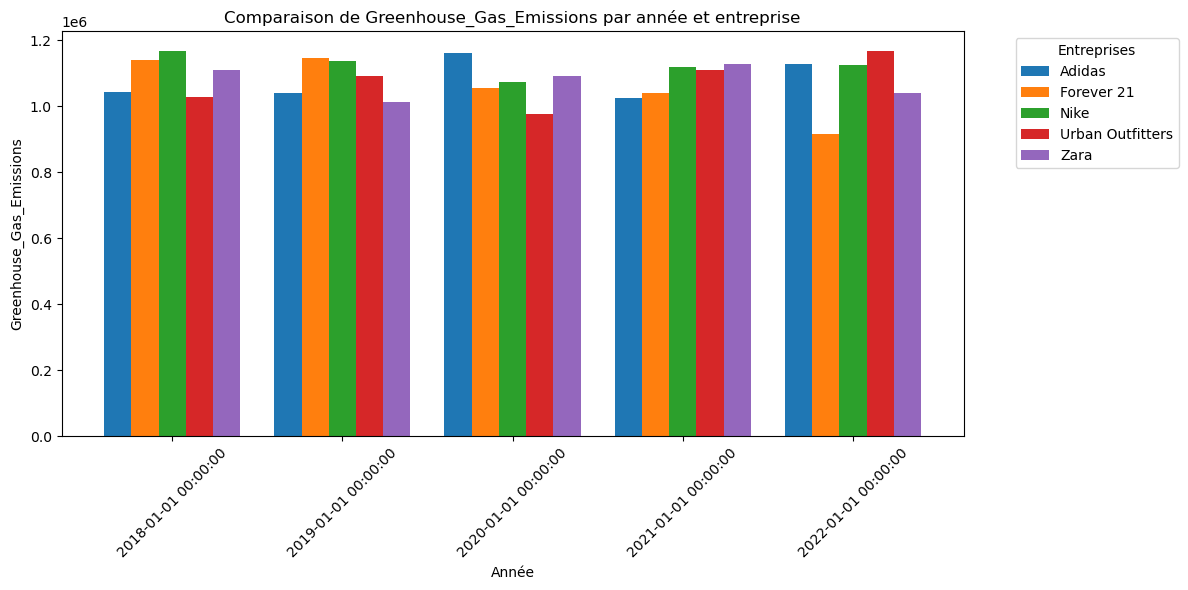

In [7]:
# Fonction pour tracer un graphique en barres groupées pour la comparaison par année et entreprise
def plot_grouped_bar_chart(df, time_column, company_column, numeric_column):
    # Créer un tableau croisant les années (x-axis) et les entreprises (barres)
    pivot_df = df_sorted.pivot_table(index=time_column, columns=company_column, values=numeric_column, aggfunc='sum')
    
    # Tracer le graphique
    pivot_df.plot(kind='bar', figsize=(12, 6), width=0.8)
    plt.title(f'Comparaison de {numeric_column} par année et entreprise')
    plt.xlabel('Année')
    plt.ylabel(numeric_column)
    plt.xticks(rotation=45)
    plt.legend(title='Entreprises', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Exemple d'appel de la fonction pour les émissions de gaz à effet de serre
plot_grouped_bar_chart(df_sorted, time_column='Production_Year', company_column='Company', numeric_column='Greenhouse_Gas_Emissions')
